In [1]:
import matplotlib as mpl
mpl.use('Agg')

from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['mathtext.fontset'] = 'dejavuserif'

import matplotlib.pyplot as plt

import massmapper as mm
import numpy as np
import random
import h5py

%matplotlib inline

In [2]:
masswidth=0.5
catalog_kind='subhalo'
dat12=mm.Mergerdata(12.,0.5,catalog_kind=catalog_kind)
dat13=mm.Mergerdata(13.,0.5,catalog_kind=catalog_kind)
dat11=mm.Mergerdata(11.,0.5,catalog_kind=catalog_kind)

# in treepm.subhalo_io.Treepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree

In [3]:
zis=np.arange(3)
#dat12.tracker(zis)

In [4]:
def N_m_M0_f(m_M0s,M0s,dat,Mmid=12.,Mwid=0.5): #N(>m/M0) function
    m_inMbin=(M0s>Mmid-Mwid/2.) & (M0s<Mmid+Mwid/2.)
    m_M0s=m_M0s[m_inMbin]
    
    iscen=dat.cat[0]['ilk']==1
    catM0s=dat.cat[0]['m.max']
    M0_inMbin=(catM0s>Mmid-Mwid/2.) & (catM0s<Mmid+Mwid/2.)
    N_fc=sum(M0_inMbin&iscen) #number of final centrals
    
    Nbins=200
    lowerbound=min(m_M0s)
    upperbound=max(m_M0s)
    #print lowerbound
    #print upperbound
    bins=np.linspace(lowerbound,upperbound,Nbins)
    midbins=(bins[:-1]+bins[1:])/2
    
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(1,1,1)
    N_m_M0=ax.hist(m_M0s,
              weights=np.repeat(1./N_fc,
                                len(m_M0s)),
              bins=bins,cumulative=-1,ec='k')[0]
    ax.set_yscale('log')
    ax.set_xlim(-3,0)
    ax.set_ylim(1e-2,10)
    plt.clf()
    
    return N_m_M0,midbins,N_fc

In [5]:
timestmp=20181030
fname='/home/users/staudt/projects/mergers/dat/true_m_M0_m.max_{}.h5'.format(timestmp)
f=h5py.File(fname,'r')
M0s_all=np.array(f['M0s'])
m_M0s_all=np.array(f['m_M0s'])

In [6]:
N_m_M0_12,logmidbins12,N_fc_12=N_m_M0_f(m_M0s_all,M0s_all,dat12)
N_m_M0_13,logmidbins13,N_fc_13=N_m_M0_f(m_M0s_all,M0s_all,dat13,Mmid=13.)
N_m_M0_11,logmidbins11,N_fc_11=N_m_M0_f(m_M0s_all,M0s_all,dat11,Mmid=11.)

midbins12=10.**logmidbins12
midbins13=10.**logmidbins13
midbins11=10.**logmidbins11

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

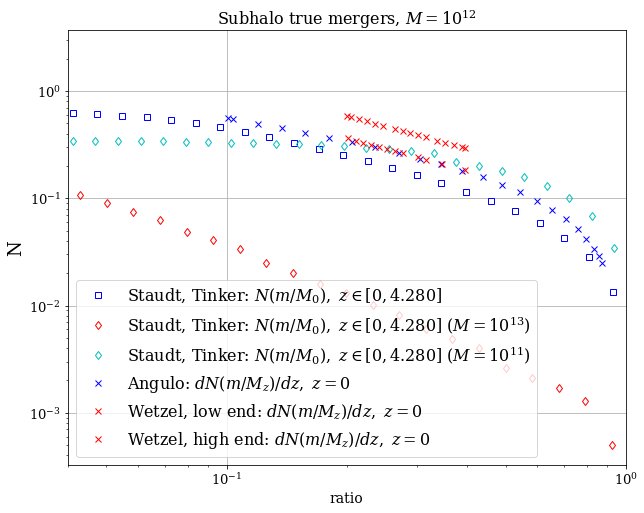

In [7]:
anguloms,anguloN=np.loadtxt('true_angulo.csv',delimiter=',',unpack=True)
wetzelloms,wetzelloN=np.loadtxt('true_wetzello.csv',delimiter=',',unpack=True)
wetzelhims,wetzelhiN=np.loadtxt('true_wetzelhi.csv',delimiter=',',unpack=True)

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)

ax.loglog(midbins12,N_m_M0_12,'s',mec='b',mfc='None',
          label='Staudt, Tinker: $N(m/M_0),\ z\in[0,{0:0.3f}]$'.
             format(dat12.zarray[34]))
ax.loglog(midbins13,N_m_M0_13,'d',mec='r',mfc='None',
          label='Staudt, Tinker: $N(m/M_0),\ z\in[0,{0:0.3f}]\ (M=10^{{13}})$'.
          format(dat13.zarray[34])
          )
ax.loglog(midbins11,N_m_M0_11,'d',mec='c',mfc='None',
          label='Staudt, Tinker: $N(m/M_0),\ z\in[0,{0:0.3f}]\ (M=10^{{11}})$'.
          format(dat11.zarray[34])
          )
ax.loglog(anguloms,anguloN,'x',mec='b',mfc='None',
          label='Angulo: $dN(m/M_z)/dz,\ z=0$')
ax.loglog(wetzelloms,wetzelloN,'x',mec='r',mfc='None',
          label='Wetzel, low end: $dN(m/M_z)/dz,\ z=0$')
ax.loglog(wetzelhims,wetzelhiN,'x',mec='r',mfc='None',
          label='Wetzel, high end: $dN(m/M_z)/dz,\ z=0$')


#ax.set_title('$M_0=10^{{{0:0.0f}}}$ halo mergers'.
#             format(mainbranches.mhal0),fontsize=16)
ax.set_title('Subhalo true mergers, $M=10^{{12}}$'.
             format(dat12.zarray[2]),fontsize=16)
ax.set_xlabel('ratio',fontsize=14)
ax.set_ylabel('N',fontsize=18)
#ax.set_ylim(10.**-1.,10**1.65)
ax.set_xlim(4e-2,10.**0.)
ax.tick_params(axis='both',labelsize=13)
ax.legend(fontsize=16)
ax.grid()

plt.show()

In [8]:
timestmp=20181031
fname='/home/users/staudt/projects/mergers/dat/true_m_M0_m.max_{}.h5'.format(timestmp)
f=h5py.File(fname,'r')
M0s_zis=np.array(f['M0s'])
m_M0s_zis=np.array(f['m_M0s'])

N_m_M0_12,logmidbins12,N_fc_12=N_m_M0_f(m_M0s_zis,M0s_zis,dat12)
N_m_M0_13,logmidbins13,N_fc_13=N_m_M0_f(m_M0s_zis,M0s_zis,dat13,Mmid=13.)
N_m_M0_11,logmidbins11,N_fc_13=N_m_M0_f(m_M0s_zis,M0s_zis,dat11,Mmid=11.)

midbins12=10.**logmidbins12
midbins13=10.**logmidbins13
midbins11=10.**logmidbins11

anguloms,anguloN=np.loadtxt('true_angulo.csv',delimiter=',',unpack=True)
wetzelloms,wetzelloN=np.loadtxt('true_wetzello.csv',delimiter=',',unpack=True)
wetzelhims,wetzelhiN=np.loadtxt('true_wetzelhi.csv',delimiter=',',unpack=True)

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

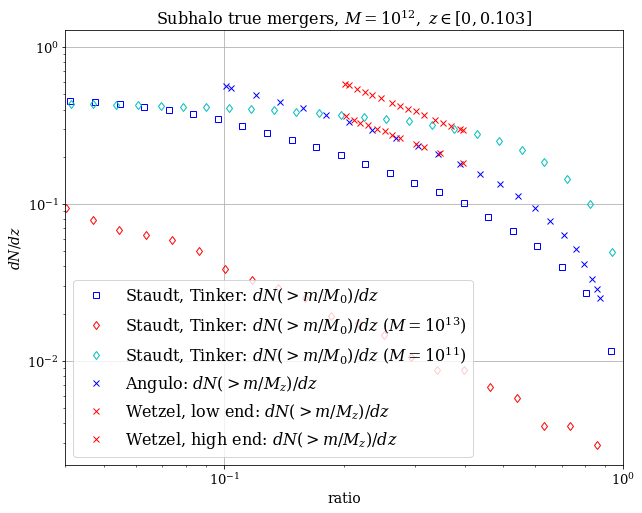

In [9]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)

ax.loglog(midbins12,N_m_M0_12/0.103,'s',mec='b',mfc='None', #division is dividing by bin size
          label='Staudt, Tinker: $dN(>m/M_0)/dz$')
ax.loglog(midbins13,N_m_M0_13/0.103,'d',mec='r',mfc='None', #division is dividing by bin size
          label='Staudt, Tinker: $dN(>m/M_0)/dz\ (M=10^{13})$')
ax.loglog(midbins11,N_m_M0_11/0.103,'d',mec='c',mfc='None', #division is dividing by bin size
          label='Staudt, Tinker: $dN(>m/M_0)/dz\ (M=10^{11})$')
ax.loglog(anguloms,anguloN,'x',mec='b',mfc='None',
          label='Angulo: $dN(>m/M_z)/dz$')
ax.loglog(wetzelloms,wetzelloN,'x',mec='r',mfc='None',
          label='Wetzel, low end: $dN(>m/M_z)/dz$')
ax.loglog(wetzelhims,wetzelhiN,'x',mec='r',mfc='None',
          label='Wetzel, high end: $dN(>m/M_z)/dz$')


#ax.set_title('$M_0=10^{{{0:0.0f}}}$ halo mergers'.
#             format(mainbranches.mhal0),fontsize=16)
ax.set_title('Subhalo true mergers, $M=10^{{12}},\ z\in[0,{0:0.3f}]$'.
             format(dat12.zarray[2]),fontsize=16)
ax.set_xlabel('ratio',fontsize=14)
ax.set_ylabel('$dN/dz$',fontsize=14)
#ax.set_ylim(10.**-1.,10**1.65)
ax.set_xlim(4e-2,10.**0.)
ax.tick_params(axis='both',labelsize=13)
ax.legend(fontsize=16)
ax.grid()

plt.show()

# Testing full redshift integration against Stewart

In [10]:
midbins_s_12,N_gmratio_s_12=np.loadtxt('stewart12m_M0.csv',
                                       delimiter=',',
                                       unpack=True)
midbins_s_13,N_gmratio_s_13=np.loadtxt('stewart13m_M0.csv',
                                       delimiter=',',
                                       unpack=True)

zis=np.arange(35)
dat12.tracker_with_opt(zis,kind='accretion')

timestmp=20181116
fname='/home/users/staudt/projects/mergers/dat/true_m_M0_m.max_{}.h5'.format(timestmp)
f=h5py.File(fname,'r')
M0s_all=np.array(f['M0s'])
m_M0s_all=np.array(f['m_M0s'])
f.close()

N_m_M0_12,logmidbins12,N_fc_12=N_m_M0_f(m_M0s_all,M0s_all,dat12,Mmid=12.)
N_m_M0_13,logmidbins13,N_fc_13=N_m_M0_f(m_M0s_all,M0s_all,dat13,Mmid=13.)
N_m_M0_11,logmidbins11,N_fc_11=N_m_M0_f(m_M0s_all,M0s_all,dat11,Mmid=11.)

midbins12=10.**logmidbins12
midbins13=10.**logmidbins13
midbins11=10.**logmidbins11

starting with 2467383 halos

snapshot 34

snapshot 33

snapshot 32

snapshot 31

snapshot 30

snapshot 29

snapshot 28

snapshot 27

snapshot 26

snapshot 25

snapshot 24

snapshot 23

snapshot 22

snapshot 21

snapshot 20

snapshot 19

snapshot 18

snapshot 17

snapshot 16

snapshot 15

snapshot 14

snapshot 13

snapshot 12

snapshot 11

snapshot 10

snapshot 9

snapshot 8

snapshot 7

snapshot 6

snapshot 5

snapshot 4

snapshot 3

snapshot 2

snapshot 1

snapshot 0


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

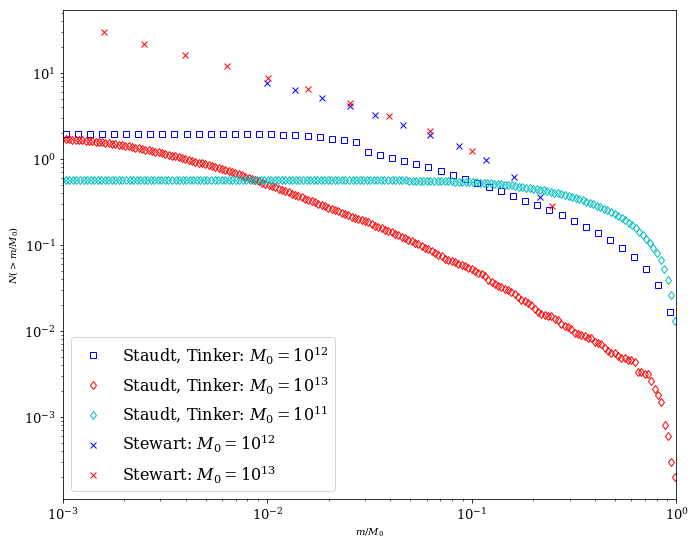

In [11]:
fig=plt.figure(figsize=(11,9))
ax=fig.add_subplot(111)
ax.loglog(midbins12,N_m_M0_12,'s',mec='b',mfc='None',
          label='Staudt, Tinker: $M_0=10^{12}$')
ax.loglog(midbins13,N_m_M0_13,'d',mec='r',mfc='None',
          label='Staudt, Tinker: $M_0=10^{13}$')
ax.loglog(midbins11,N_m_M0_11,'d',mec='c',mfc='None',
          label='Staudt, Tinker: $M_0=10^{11}$')
ax.loglog(midbins_s_12,N_gmratio_s_12,'x',mec='b',
          label='Stewart: $M_0=10^{12}$')
ax.loglog(midbins_s_13,N_gmratio_s_13,'x',mec='r',
          label='Stewart: $M_0=10^{13}$')
ax.set_ylabel('$N(>m/M_0)$')
ax.set_xlabel('$m/M_0$')
ax.set_xlim(1e-3,1.)
ax.tick_params(axis='both',labelsize=13)
ax.legend(fontsize=16)